In [1]:
#Dependencies
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib notebook
#Read in CSV file and merge them
#alcohol_data_csv=os.path.join('U.S._Chronic_Disease_Indicators__Alcohol.csv')
#alcohol_data=pd.read_csv(alcohol_data_csv).encode('utf-8')

#question_breakdown_csv=("Question_breakdown_w_age_CMT.csv")
#question_breakdown_data=pd.read_csv(question_breakdown_csv)




#merged_data=pd.merge(alcohol_data,question_breakdown_data,on="Question")
#merged_data.head()

In [2]:
#merged_data.columns

In [3]:
#merged_data_edited=merged_data[["YearStart","LocationDesc","DataValue","DataValueUnit", "DataValueType",\
                                #"StratificationCategory1","Stratification1","Binge_Heavy","Description", "Sex","Age",\
                                #"Question_additional_comments","DataSource","Topic","Question"]]
#merged_data_edited.head()

In [4]:
#merged_data_edited.to_csv("merged_data_edited.csv")

In [5]:
merged_data_new_csv=("merged_data_edited.csv")
merged_data_new=pd.read_csv(merged_data_new_csv)
#merged_data_new.head()

In [6]:
#Convert % into one column if DataValue = percent
dataVal_w_units=merged_data_new["DataValue"]+ " " + merged_data_new["DataValueUnit"]
merged_data_new['DataVal with Units']=dataVal_w_units
#merged_data_new.columns

In [7]:
#Add sex_age category for Gender with Sex column
sex_adults=merged_data_new.loc[(merged_data_new["Sex"] == "Adults")\
                               & (merged_data_new["StratificationCategory1"] == "Gender")\
                               & (merged_data_new["LocationDesc"]== "United States")\
                               & (merged_data_new["DataValueType"]== "Crude Prevalence")
                               & (merged_data_new["Binge_Heavy"]== "Binge")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType"]]

#Sex_Age_Calc
sex_age=sex_adults["Stratification1"] + " "  + sex_adults["Age"]
sex_adults['sex_age']=sex_age
sex_adults_agesex=sex_adults[["YearStart","DataValue","sex_age"]]

#Add sex_age category for NOT Adultsfor reverse Concatenate 

sex_not_adults=merged_data_new.loc[(merged_data_new["Sex"] != "Adults")\
                                   &(merged_data_new["StratificationCategory1"] == "Overall")\
                                   & (merged_data_new["LocationDesc"]== "United States")\
                                   & (merged_data_new["DataValueType"]== "Crude Prevalence")\
                                   & (merged_data_new["Binge_Heavy"]== "Binge")
                                   ,:]

sex_not_adults_agesex=sex_not_adults[["YearStart","DataValue","Age","Sex"]]
sex_age=sex_not_adults["Sex"] + " "  +sex_not_adults["Age"]
sex_not_adults_agesex['sex_age']=sex_age
sex_not_adults_agesex=sex_not_adults_agesex[["YearStart","DataValue","sex_age"]]

#Merge Data
chart1_data_base=pd.merge(sex_adults_agesex,sex_not_adults_agesex,how="outer")
chart1_data_base["DataValue"]=chart1_data_base["DataValue"].astype(float)
chart1_data_base["YearStart"]=chart1_data_base["YearStart"].astype(int)

#chart1_data_base

C:\Users\Craig\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
chart1_data_base=chart1_data_base.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')

chart1_data_base

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,12.6,11.4,11.3,11.1,11.7,12.0
Male >=18,24.2,22.9,22.2,21.4,21.4,21.9
Women 18-44,19.4,17.4,17.6,16.9,17.7,18.7
Youth 14 to 18,NaN,NaN,20.8,NaN,17.7,NaN


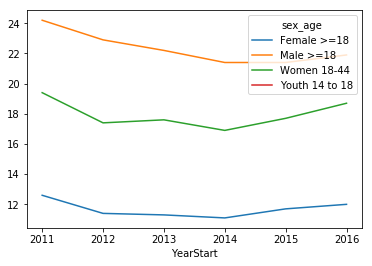

In [9]:
#CHART 1 line chart
chart1_data_base.T.plot(kind='line')

In [10]:
chart2_data_Base=merged_data_new
#Sex_Age_Calc
sex_age=chart2_data_Base["Stratification1"] + " "  + chart2_data_Base["Age"]
chart2_data_Base['sex_age']=sex_age


#Add sex_age category for Gender with Sex column
chart2_data_base=chart2_data_Base.loc[(chart2_data_Base["Description"] == "intensity")\
                               & (chart2_data_Base["LocationDesc"]== "United States")\
                               & (chart2_data_Base["DataValueType"]== "Mean")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType","sex_age"]]

chart2_data_base["DataValue"]=chart2_data_base["DataValue"].astype(float)
#intensity_drinking.dtypes

chart2_data_base_chart=chart2_data_base[["YearStart","DataValue","sex_age"]]
#chart2_data_base_chart

In [11]:
chart2_data_base_chart=chart2_data_base_chart.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')
chart2_data_base_chart

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,5.8,5.7,5.7,5.7,5.6,5.6
Male >=18,8.8,8.6,8.7,8.6,8.5,8.5
Overall >=18,7.8,7.6,7.7,7.6,7.5,7.4


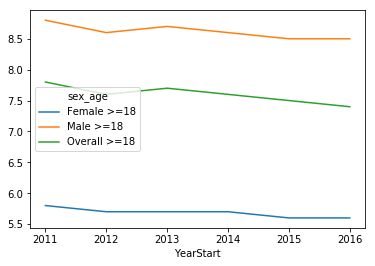

In [12]:
#CHART 2 line chart
chart2_data_base_chart.T.plot(kind='line')

In [13]:
chart3_data_base=merged_data_new

#Sex_Age_Calc
sex_age=chart3_data_base["Stratification1"] + " "  + chart3_data_base["Age"]
chart3_data_base['sex_age']=sex_age


#Add sex_age category for Gender with Sex column
chart3_data_base=chart3_data_base.loc[(chart3_data_base["Description"] == "frequency")\
                               & (chart3_data_base["LocationDesc"]== "United States")\
                               & (chart3_data_base["DataValueType"]== "Mean")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType","sex_age"]]


chart3_data_base["DataValue"]=chart3_data_base["DataValue"].astype(float)

chart3_data_base_chart=chart3_data_base[["YearStart","DataValue","sex_age"]]


In [14]:
chart3_data_base_chart=chart3_data_base_chart.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')
#chart3_data_base_chart

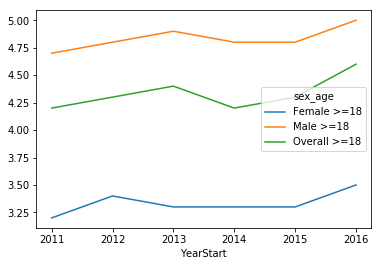

In [15]:
#CHART 3 line chart
chart3_data_base_chart.T.plot(kind='line')